In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
   

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [19]:
# Load the Boston Housing dataset
# boston = load_boston()
# data = pd.DataFrame(boston.data, columns=boston.feature_names)
# data['PRICE'] = boston.target


boston = fetch_california_housing()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1],
data.iloc[:, -1], test_size=0.2, random_state=42)

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,
header=None)
data = np.hstack([raw_df.values[::2, :],
raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [20]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Define the model
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(64, activation='relu',
input_shape=(X_train.shape[1],)),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(1)])

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
validation_split=0.2)

Epoch 1/100
413/413 [==============================] - 2s 3ms/step - loss: 0.9428 - val_loss: 0.4706
Epoch 2/100
413/413 [==============================] - 1s 2ms/step - loss: 0.4144 - val_loss: 0.4078
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3680 - val_loss: 0.3971
Epoch 4/100
413/413 [==============================] - 1s 3ms/step - loss: 0.3576 - val_loss: 0.3783
Epoch 5/100
413/413 [==============================] - 1s 4ms/step - loss: 0.3441 - val_loss: 0.3861
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3332 - val_loss: 0.3741
Epoch 7/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3275 - val_loss: 0.3494
Epoch 8/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3228 - val_loss: 0.3416
Epoch 9/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3146 - val_loss: 0.3683
Epoch 10/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3260 - val_lo

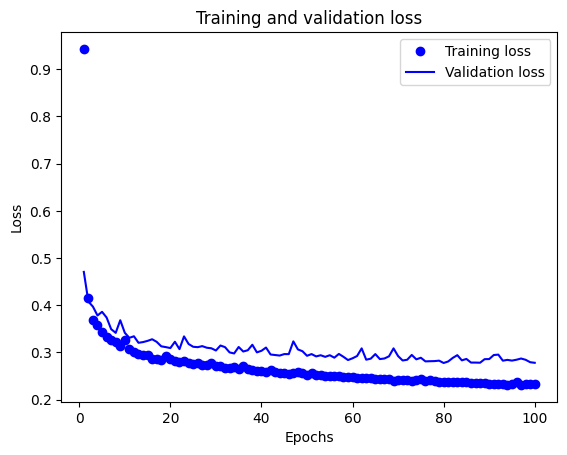

In [23]:
# Visualize the training history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

129/129 [==============================] - 0s 1ms/step


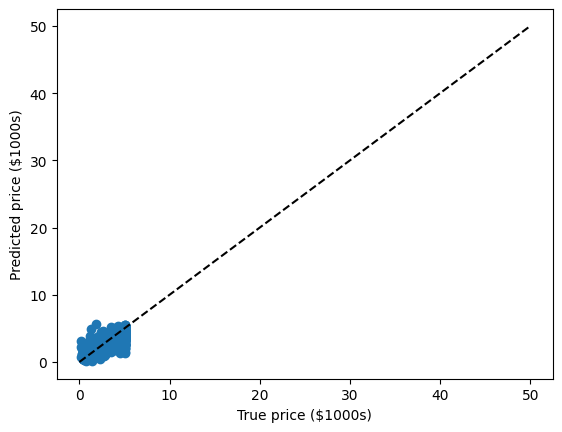

In [24]:
# Visualize the linear regression graph
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.show()